<a href="https://colab.research.google.com/github/marianaolmedo/Simulacion-II/blob/main/Metropolis_Hastings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Algoritmo Metropolis-Hastings**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

La función de densidad:
$$f(x)= c \hspace{0.2cm}exp (-(x^2_1 x_2^2 + x_1^2 + x_2^2 - 8x_1 - 8x_2)/2)$$
donde $c$ es una constante de normalización tal que
$$\int\int f(x_1x_2)dx_1dx_2=1$$

In [2]:
def f(x):
    x1, x2 = x
    return np.exp(-(x1**2 * x2**2 + x1**2 + x2**2 - 8*x1 - 8*x2)/2)

El algoritmo no usa $f(x)$ directamente, sino razones entre valores de $f$:
$$ \alpha(x,y)=min\left( 1, \frac{f(y)}{f(x)} \right)$$

In [3]:
def alpha(x, y):
    return min(1, f(y)/f(x))


Ahora se genera un nuevo punto candidato usando una distribución normal multivariante centrada en la posición actual $x_{a}$
.

$$y \thicksim q(\cdot |x_t)$$

In [14]:
def norm(mu, s):
    cov = np.eye(2) * s**2
    return np.random.multivariate_normal(mu, cov)

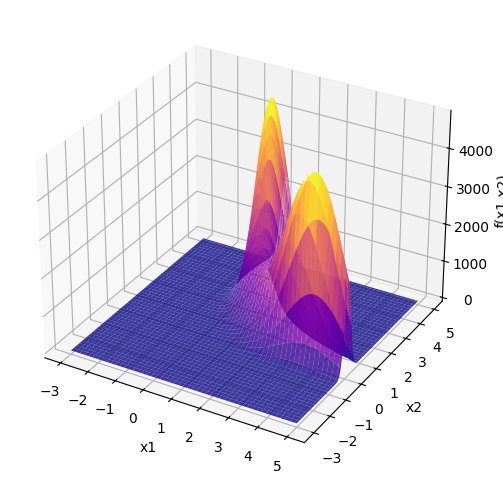

In [12]:
# Gráfica objetivo
x1 = np.linspace(-3, 5, 100)
x2 = np.linspace(-3, 5, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.exp(- (X1**2 * X2**2 + X1**2 + X2**2 - 8*X1 - 8*X2)/2)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='plasma', alpha=0.8)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1,x2)")
plt.show()


In [16]:
def MH_2D(x0, n, s):
    h = [x0]
    l_aceptados = 0

    for i in range(n):
        x_a = h[-1]
        y = norm(x_a, s)
        u = np.random.rand()

        if u <= alpha(x_a, y):
            h.append(y)
            l_aceptados = l_aceptados + 1
        else:
            h.append(x_a)

    p_a = l_aceptados / n
    return np.array(h), p_a



In [19]:
# Parametros
n=50000
s=0.7
np.random.seed(0)
x0 = [0, 0]
chain, rate = MH_2D(x0, n, s)
print(f"Tasa de aceptación promedio: {rate:.3f}")


Tasa de aceptación promedio: 0.414


El algoritmo Metropolis–Hastings genera una cadena de Markov cuya
distribución estacionaria es proporcional a $f(x1, x2)$

Esto ocurre porque cumple:
$$f(x)P(x→y) = f(y)P(y→x)$$

Con esto, podemos decir que tras suficientes iteraciones, los puntos visitados
siguen la distribución objetivo sin requerir conocer la constante de normalización

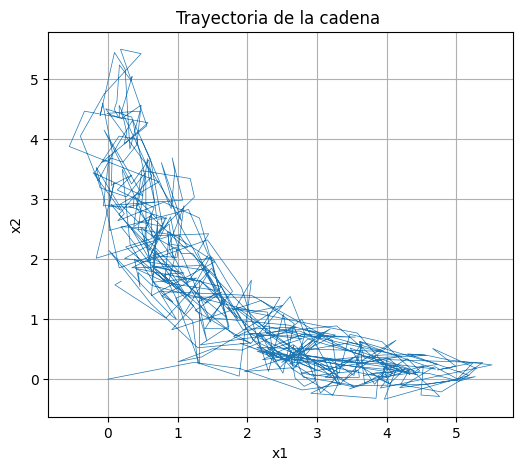

In [24]:
# Grafica de las primeras iteraciones
plt.figure(figsize=(6,5))
plt.plot(chain[:1000,0], chain[:1000,1], lw=0.5)
plt.title("Trayectoria de la cadena ")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


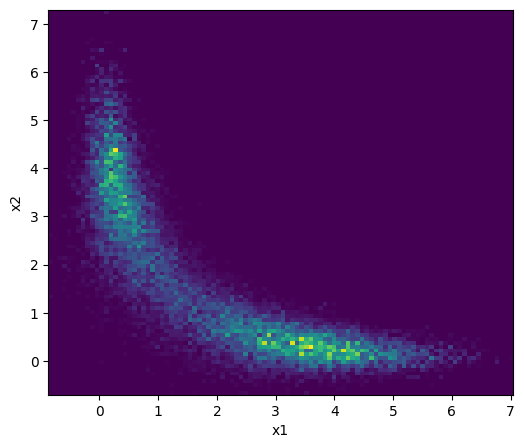

In [25]:
# Histograma 2D
plt.figure(figsize=(6,5))
plt.hist2d(chain[:,0], chain[:,1], bins=100, density=True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()